In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
file_names = {
    "train": "data/nlfl_train_sample_v3.xlsx",
    "test": "data/nlfl_test_sample_v3.xlsx",
    "val": "data/nlfl_val_sample_v3.xlsx",
}

In [3]:
A_train = pd.read_excel(file_names["train"], index_col="id").sample(frac = 1, random_state=2022).reset_index()
A_val = pd.read_excel(file_names["val"])
A_test = pd.read_excel(file_names["test"])

<AxesSubplot: >

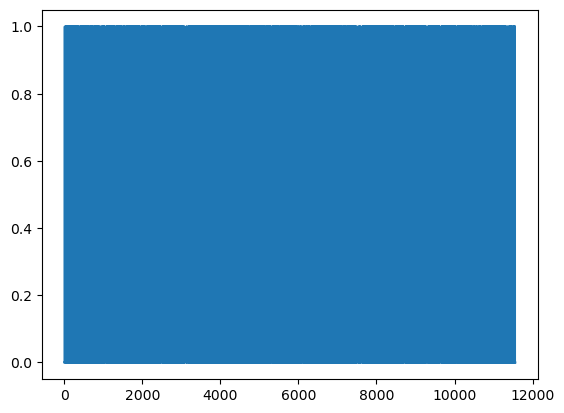

In [4]:
A_train["label"].plot()

In [5]:
rel_cols = [c for c in A_train.columns if "chatgpt_label" != c and "chatgpt_" in c]
rel_cols

['chatgpt_v1 (N)',
 'chatgpt_v1 (Y)',
 'chatgpt_v2 (N)',
 'chatgpt_v2 (Y)',
 'chatgpt_v3 (N)',
 'chatgpt_v3 (Y)',
 'chatgpt_v4 (N)',
 'chatgpt_v4 (Y)',
 'chatgpt_v5 (N)',
 'chatgpt_v5 (Y)',
 'chatgpt_v6 (N)',
 'chatgpt_v6 (Y)',
 'chatgpt_v7 (N)',
 'chatgpt_v7 (Y)',
 'chatgpt_v8 (N)',
 'chatgpt_v8 (Y)',
 'chatgpt_v9 (N)',
 'chatgpt_v9 (Y)',
 'chatgpt_v10 (N)',
 'chatgpt_v10 (Y)',
 'chatgpt_v5_1 (N)',
 'chatgpt_v5_1 (Y)',
 'chatgpt_v5_2 (N)',
 'chatgpt_v5_2 (Y)',
 'chatgpt_v5_3 (N)',
 'chatgpt_v5_3 (Y)',
 'chatgpt_v5_4 (N)',
 'chatgpt_v5_4 (Y)',
 'chatgpt_v5_5 (N)',
 'chatgpt_v5_5 (Y)',
 'chatgpt_v6_1 (N)',
 'chatgpt_v6_1 (Y)',
 'chatgpt_v6_2 (N)',
 'chatgpt_v6_2 (Y)',
 'chatgpt_v6_3 (N)',
 'chatgpt_v6_3 (Y)',
 'chatgpt_v6_4 (N)',
 'chatgpt_v6_4 (Y)',
 'chatgpt_Q3_1 (N)',
 'chatgpt_Q3_1 (Y)',
 'chatgpt_Q3_2 (N)',
 'chatgpt_Q3_2 (Y)',
 'chatgpt_Q3_3 (N)',
 'chatgpt_Q3_3 (Y)',
 'chatgpt_Q3_4 (N)',
 'chatgpt_Q3_4 (Y)',
 'chatgpt_Q3_5 (N)',
 'chatgpt_Q3_5 (Y)',
 'chatgpt_Q3_6 (N)',
 'chatgpt

In [6]:
%%time
new_A_test = A_test.copy()
new_A_train = A_train.copy()
new_A_val = A_val.copy()

bigcut = ['chatgpt_v1 (Y)', 'chatgpt_v2 (Y)', 'chatgpt_v3 (N)',
       'chatgpt_v5 (N)', 'chatgpt_v6 (N)', 'chatgpt_v6 (Y)',
       'chatgpt_v7 (N)', 'chatgpt_v8 (Y)', 'chatgpt_v10 (Y)',
       'chatgpt_v5_2 (Y)', 'chatgpt_v5_3 (N)', 'chatgpt_v5_3 (Y)',
       'chatgpt_v5_4 (N)', 'chatgpt_v5_5 (Y)', 'chatgpt_v6_1 (N)',
       'chatgpt_v6_1 (Y)', 'chatgpt_Q3_1 (N)', 'chatgpt_Q3_1 (Y)',
       'chatgpt_Q3_2 (N)', 'chatgpt_Q3_2 (Y)', 'chatgpt_Q3_3 (Y)',
       'chatgpt_Q3_5 (N)', 'chatgpt_Q3_6 (N)', 'chatgpt_Q3_6 (Y)',
       'chatgpt_Q3_8 (N)', 'chatgpt_Q3_8 (Y)', 'chatgpt_Q3_9 (N)',
       'chatgpt_Q3_10 (N)', 'chatgpt_Q3_10 (Y)', 'chatgpt_Q3_12 (N)',
       'chatgpt_Q3_14 (N)', 'chatgpt_Q3_14 (Y)', 'chatgpt_Q3_15 (N)',
       'chatgpt_Q3_15 (Y)', 'chatgpt_Q3_16 (N)', 'chatgpt_Q3_7_e1 (N)',
       'chatgpt_Q3_7_e1 (Y)', 'chatgpt_Q3_7_e2 (Y)',
       'chatgpt_Q3_7_e3 (N)', 'chatgpt_Q3_7_e4 (Y)',
       'chatgpt_Q3_7_e5 (Y)', 'chatgpt_10_e1 (N)', 'chatgpt_10_e5 (Y)',
       'chatgpt_7_e1 (N)', 'chatgpt_7_e1 (Y)', 'chatgpt_7_e2 (N)',
       'chatgpt_7_e3 (N)', 'chatgpt_7_e4 (N)', 'chatgpt_Q3_4_e1 (N)',
       'chatgpt_Q3_4_e1 (Y)', 'chatgpt_Q3_4_e2 (Y)',
       'chatgpt_Q3_4_e3 (Y)', 'chatgpt_Q3_4_e4 (Y)',
       'chatgpt_Q3_5_e2 (N)', 'chatgpt_Q3_5_e4 (Y)', 'chatgpt_HF_2 (Y)',
       'chatgpt_HF_3 (Y)', 'chatgpt_HF_4 (N)', 'chatgpt_SP_1 (N)',
       'chatgpt_SP_2 (Y)', 'chatgpt_SP_4 (Y)', 'chatgpt_SP_5 (N)',
       'chatgpt_SP_6 (N)', 'chatgpt_SP_6 (Y)']
len(bigcut)

CPU times: user 0 ns, sys: 3.65 ms, total: 3.65 ms
Wall time: 3.4 ms


64

In [7]:
new_A_train.iloc[0:][bigcut]

,chatgpt_v1 (Y),chatgpt_v2 (Y),chatgpt_v3 (N),chatgpt_v5 (N),chatgpt_v6 (N),chatgpt_v6 (Y),chatgpt_v7 (N),chatgpt_v8 (Y),chatgpt_v10 (Y),chatgpt_v5_2 (Y),...,chatgpt_Q3_5_e4 (Y),chatgpt_HF_2 (Y),chatgpt_HF_3 (Y),chatgpt_HF_4 (N),chatgpt_SP_1 (N),chatgpt_SP_2 (Y),chatgpt_SP_4 (Y),chatgpt_SP_5 (N),chatgpt_SP_6 (N),chatgpt_SP_6 (Y)
0,0.188718,0.132679,0.871060,0.907873,0.874617,0.147539,0.050355,0.258807,0.867311,0.425349,...,0.202222,0.407081,0.266678,0.565818,0.211885,0.225311,0.611836,0.689286,0.769335,0.205009
1,0.649700,0.606070,0.433825,0.800133,0.721065,0.334636,0.061304,0.610766,0.817359,0.649023,...,0.657997,0.739698,0.624346,0.371578,0.223496,0.647350,0.677812,0.411591,0.415988,0.664460
2,0.695815,0.622938,0.394148,0.753878,0.537597,0.458100,0.041318,0.598321,0.856645,0.682702,...,0.665142,0.611335,0.604869,0.326528,0.121597,0.699322,0.748506,0.342123,0.395269,0.692664
3,0.234357,0.171390,0.733718,0.937383,0.923375,0.059339,0.048473,0.220668,0.588132,0.210189,...,0.224726,0.262470,0.248231,0.656185,0.403232,0.227442,0.255073,0.726112,0.711837,0.245129
4,0.078039,0.061976,0.926050,0.970505,0.969734,0.028052,0.732937,0.078929,0.143635,0.065245,...,0.074230,0.068854,0.072694,0.931767,0.921096,0.080596,0.064752,0.920716,0.915882,0.084049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,0.035683,0.031398,0.929730,0.961836,0.968757,0.018661,0.059784,0.037715,0.164997,0.035877,...,0.043750,0.049046,0.048388,0.904142,0.866427,0.042227,0.038966,0.912885,0.907543,0.043510
11555,0.269840,0.177807,0.841410,0.955108,0.899107,0.140256,0.050023,0.276454,0.817929,0.318834,...,0.269855,0.327267,0.276181,0.655347,0.259128,0.277478,0.444294,0.794465,0.794085,0.277307
11556,0.168320,0.121525,0.843283,0.960292,0.950777,0.047455,0.380095,0.154911,0.308636,0.139451,...,0.163535,0.157382,0.159395,0.866256,0.842161,0.168887,0.149274,0.839866,0.846077,0.168443
11557,0.091335,0.063889,0.734949,0.940178,0.924499,0.027063,0.084956,0.091127,0.326852,0.111856,...,0.110005,0.123866,0.115130,0.777414,0.603205,0.096358,0.128685,0.726397,0.725586,0.100972


In [8]:
%%capture
!pip install transformers
!pip install datasets
!pip install torch

In [9]:
from transformers import BertTokenizer, BertModel
import torch

In [10]:
model_name = "dccuchile/bert-base-spanish-wwm-cased"
beto_model = BertModel.from_pretrained(model_name)
beto_tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=False)
e = beto_model.eval()

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
beto_tokenizer.all_special_tokens, beto_tokenizer.all_special_ids

(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'], [3, 5, 1, 4, 0])

In [12]:
from torch.utils.data import Dataset
class DatasetTaskC1(Dataset):
    def __init__(self, df, maxlen):
        self.df = df
        self.tokenizer = beto_tokenizer
        self.maxlen = maxlen

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        sentence1 = str(self.df.loc[index, 'Q'])
        sentence2 = str(self.df.loc[index, 'A'])
        
        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())

        label = self.df.loc[index, 'label']
        
        tokens1 = self.tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = self.tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]

        if len(tokens1) < self.maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(self.maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:self.maxlen]

        if len(tokens2) < self.maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(self.maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:self.maxlen]
          
        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]
        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1

        mf_tensor = torch.tensor(self.df.loc[index, :][bigcut])

        return mf_tensor, tokens_ids_tensor, attn_mask, label

In [55]:
from torch.utils.data import DataLoader

train_set = DatasetTaskC1(df = new_A_train, maxlen = 60)
val_set = DatasetTaskC1(df = new_A_test, maxlen = 60)

train_loader = DataLoader(train_set, batch_size = 32, num_workers = 2, shuffle=False)
val_loader = DataLoader(val_set, batch_size = 32, num_workers = 2, shuffle=False)

In [56]:
import torch.nn as nn
class C1Classifier(nn.Module):
    def __init__(self):
        super(C1Classifier, self).__init__()
        torch.manual_seed(2022)
        
        self.bert_layer = BertModel.from_pretrained(model_name).cuda()
        self.cls_layer = nn.Linear(64+768, 2).cuda()
        # self.cls_layer2 = nn.Linear(768, 2).cuda()

    def forward(self, mfs, seq, attn_masks):

        cont_reps = self.bert_layer(seq, attention_mask=attn_masks)
        
        cls_rep = cont_reps.last_hidden_state[:, 0]
        mfs = mfs.to(cls_rep.dtype)
        cls_rep = torch.cat((mfs,cls_rep), 1)

        logits = self.cls_layer(cls_rep)
        # logits = self.cls_layer2(inter)

        return logits

In [62]:
import torch.optim as optim

net = C1Classifier()

weights = torch.tensor([1., 6.5])
criterion = nn.CrossEntropyLoss(weight=weights, reduction='mean').cuda()

opti = optim.Adam(net.parameters(), lr = 2e-5)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [58]:
def get_accuracy_from_logits(logits, labels):
    probs = torch.sigmoid(logits)
    soft_probs = probs.argmax(1)
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc
    
def evaluate(net, criterion, dataloader):
    net.eval()
    mean_acc, mean_loss = 0, 0
    count = 0
    with torch.no_grad():
        for mfs, seq, attn_masks, labels in dataloader:
            mfs, seq, attn_masks, labels = mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(mfs, seq, attn_masks)
            mean_loss += criterion(logits, labels).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def evaluate_precision_recall_fscore_support(net, dataloader):
    net.eval()
    preds = []
    tests = []
    with torch.no_grad():
        for mfs, seq, attn_masks, labels in dataloader:
            mfs, seq, attn_masks, labels = mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(mfs, seq, attn_masks)
            probs = torch.sigmoid(logits)
            soft_probs = probs.argmax(1)
            preds += soft_probs.squeeze().tolist()
            tests += labels.tolist()
    return tests, preds

In [59]:
def train(net, criterion, opti, train_loader, val_loader, epochs):
    for ep in range(epochs):
        for it, (mfs, seq, attn_masks, labels) in enumerate(train_loader):
            opti.zero_grad()  

            mfs, seq, attn_masks, labels = mfs.cuda(), seq.cuda(), attn_masks.cuda(), labels.cuda()

            logits = net(mfs, seq, attn_masks)

            loss = criterion(logits, labels)

            loss.backward()

            opti.step()

            if (it + 1) % 100 == 0:
                acc = get_accuracy_from_logits(logits, labels)
                # tests, preds = evaluate_precision_recall_fscore_support(net, train_loader)
                # print(classification_report(tests, preds))
                print("Iteration {} of epoch {} complete. Loss : {} Train Accuracy : {}".format(it+1, ep+1, loss.item(), acc))
        val_acc, val_loss = evaluate(net, criterion, val_loader)
        tests, preds = evaluate_precision_recall_fscore_support(net, val_loader)
        print(classification_report(tests, preds))
        print("Epoch {} complete! Validation Accuracy : {}, Validation Loss : {}".format(ep+1, val_acc, val_loss))

In [63]:
epochs = 1
train(net, criterion, opti, train_loader, val_loader, epochs)

Iteration 100 of epoch 1 complete. Loss : 0.28104883432388306 Train Accuracy : 0.9375
Iteration 200 of epoch 1 complete. Loss : 0.1956568956375122 Train Accuracy : 0.96875
Iteration 300 of epoch 1 complete. Loss : 0.4584180414676666 Train Accuracy : 0.9375
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       541
           1       0.77      0.76      0.77       136

    accuracy                           0.91       677
   macro avg       0.86      0.85      0.85       677
weighted avg       0.91      0.91      0.91       677

Epoch 1 complete! Validation Accuracy : 0.9105113744735718, Validation Loss : 0.35147314180027356


In [64]:
from huggingface_hub import notebook_login

In [1]:
notebook_login()

NameError: name 'notebook_login' is not defined

In [66]:
!git config --global credential.helper store

In [2]:
repo_name = "beto_best_nllf_ft_task_C1"
net.bert_layer.push_to_hub(repo_name)

NameError: name 'net' is not defined

In [3]:
val_set.tokenizer.push_to_hub(repo_name)

NameError: name 'val_set' is not defined

In [69]:
torch.save(net.cls_layer, "cls_layer.torch")
# torch.save(net.cls_layer2, "cls_layer2.torch")

In [70]:
from huggingface_hub import hf_hub_url, cached_download

In [4]:
repo_name = "beto_best_nllf_ft_task_C1"
config_file_url = hf_hub_url("X/"+repo_name, filename="cls_layer.torch")
value = cached_download(config_file_url)
cls_layer = torch.load(value)
# config_file_url = hf_hub_url("X/"+repo_name, filename="cls_layer2.torch")
# value = cached_download(config_file_url)
# cls_layer2 = torch.load(value)

NameError: name 'hf_hub_url' is not defined

In [72]:
beto_model = BertModel.from_pretrained("X/"+repo_name).cuda()
beto_tokenizer = BertTokenizer.from_pretrained("X/"+repo_name, do_lower_case=False)
e = beto_model.eval()

In [73]:
def preproccesing(Q, A, maxlen=60):
        sentence1 = str(Q)
        sentence2 = str(A)
        
        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())
        
        tokens1 = beto_tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = beto_tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]

        if len(tokens1) < maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:maxlen]

        if len(tokens2) < maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:maxlen]
          
        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]
        # tokens = [x for x in tokens if x!="[PAD]"]
        tokens_ids = beto_tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1

        return tokens_ids_tensor.cuda(), attn_mask.cuda()

In [74]:
def C1Classifier(mfs, Q, A):
    tokens_ids_tensor, attn_mask = preproccesing(Q, A)
    cont_reps = beto_model(tokens_ids_tensor.unsqueeze(0), attention_mask = attn_mask.unsqueeze(0))
    cls_rep = cont_reps.last_hidden_state[:, 0]
    mfs = torch.tensor(mfs).cuda()
    mfs = mfs.to(cls_rep.dtype).unsqueeze(0)
    cls_rep = torch.cat((mfs,cls_rep), 1)
    logits = cls_layer(cls_rep)
    # logits = cls_layer2(inter)
    probs = torch.sigmoid(logits)
    return probs.detach().cpu().numpy()[0]

In [75]:
i = 0
mfs = new_A_train.iloc[i][bigcut]
Q = A_train.iloc[i]["Q"], 
A = A_train.iloc[i]["A"]
print(Q, A)
C1Classifier(mfs, Q, A)

('Luis compró 10 caramelos, de los cuales 4 tenían menta, los demás no. ¿Cuántos caramelos no tenían menta? Representa esta ecuación.',) tiene 30 en total


array([0.6068136, 0.553164 ], dtype=float32)

In [76]:
from sklearn.metrics import classification_report

In [77]:
%%time
y_pred = [ int(
    C1Classifier(
        mfs=new_A_train.iloc[i][bigcut], 
        Q=A_train.iloc[i]["Q"], 
        A=A_train.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_train.shape[0])
]
report = classification_report(A_train["label"], y_pred, output_dict=True)
train_report = pd.DataFrame(report)
train_report

CPU times: user 1min 41s, sys: 16.2 ms, total: 1min 41s
Wall time: 1min 41s


,0,1,accuracy,macro avg,weighted avg
precision,0.986329,0.912224,0.976469,0.949276,0.976456
recall,0.986526,0.911039,0.976469,0.948782,0.976469
f1-score,0.986427,0.911631,0.976469,0.949029,0.976462
support,10019.000000,1540.000000,0.976469,11559.000000,11559.000000


In [78]:
pickle.dump(y_pred, open("data/y_pred_train_beto_best_nllf_ft_task_C1.pickle", "wb"))

In [79]:
%%time
y_pred = [ int(
    C1Classifier(
        new_A_val.iloc[i][bigcut], 
        A_val.iloc[i]["Q"], 
        A_val.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_val.shape[0])]
report = classification_report(A_val["label"], y_pred, output_dict=True)
val_report = pd.DataFrame(report)
val_report

CPU times: user 25.4 s, sys: 4.05 ms, total: 25.4 s
Wall time: 25.4 s


,0,1,accuracy,macro avg,weighted avg
precision,0.969243,0.856354,0.955141,0.912798,0.954129
recall,0.979283,0.798969,0.955141,0.889126,0.955141
f1-score,0.974237,0.826667,0.955141,0.900452,0.954479
support,2510.000000,388.000000,0.955141,2898.000000,2898.000000


In [80]:
pickle.dump(y_pred, open("data/y_pred_val_beto_best_nllf_ft_task_C1.pickle", "wb"))

In [81]:
%%time
y_pred = [ int(
    C1Classifier(
        new_A_test.iloc[i][bigcut], 
        A_test.iloc[i]["Q"], 
        A_test.iloc[i]["A"]
        )[0]<0.5) 
    for i in range(A_test.shape[0])]
report = classification_report(A_test["label"], y_pred, output_dict=True)
test_report = pd.DataFrame(report)
test_report

CPU times: user 5.69 s, sys: 3.96 ms, total: 5.69 s
Wall time: 5.69 s


,0,1,accuracy,macro avg,weighted avg
precision,0.929856,0.801653,0.906942,0.865755,0.904102
recall,0.955638,0.713235,0.906942,0.834437,0.906942
f1-score,0.942571,0.754864,0.906942,0.848717,0.904863
support,541.000000,136.000000,0.906942,677.000000,677.000000


In [82]:
pickle.dump(y_pred, open("data/y_pred_test_beto_best_nllf_ft_task_C1.pickle", "wb"))

In [83]:
import pandas as pd 
import pickle
from sklearn.metrics import classification_report
import numpy as np

file_names = {
    "train": "data/train_task_C1.xlsx",
    "test": "data/test_task_C1.xlsx",
    "val": "data/val_task_C1.xlsx",
    "mf_train": "data/mf_features_train_task_C1.xlsx",
    "mf_test": "data/mf_features_test_task_C1.xlsx",
    "mf_val": "data/mf_features_val_task_C1.xlsx",
}
A_test = pd.read_excel(file_names["test"])
test_label_Q = pd.read_excel("data/gpt_label_v7_comp.xlsx")
A_test["label_Q"] = A_test.apply(lambda x: test_label_Q[test_label_Q["id"] == x["id"]].iloc[0]["tipo_preg"], axis=1)
y_pred = pickle.load(open("data/y_pred_test_beto_best_nllf_ft_task_C1.pickle", "rb"))
sub_index_test = A_test["label_Q"] == 3
print(classification_report(A_test.loc[A_test[sub_index_test].index]["label"], np.array(y_pred)[sub_index_test.values], digits=4))

              precision    recall  f1-score   support

           0     0.9808    0.9771    0.9790       262
           1     0.8571    0.8780    0.8675        41

    accuracy                         0.9637       303
   macro avg     0.9190    0.9276    0.9232       303
weighted avg     0.9641    0.9637    0.9639       303

